<a href="https://colab.research.google.com/github/lmksoehd/ABC_boot_camp/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%8901(8%EC%9B%949%EC%9D%BC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1)데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

raw_data = pd.read_excel('/content/titanic.xlsx')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [ ]:
raw_data.describe()   # 생존률이 0.38

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


## 2) 나도 해본다 그래프 그리기 feat.jung ki

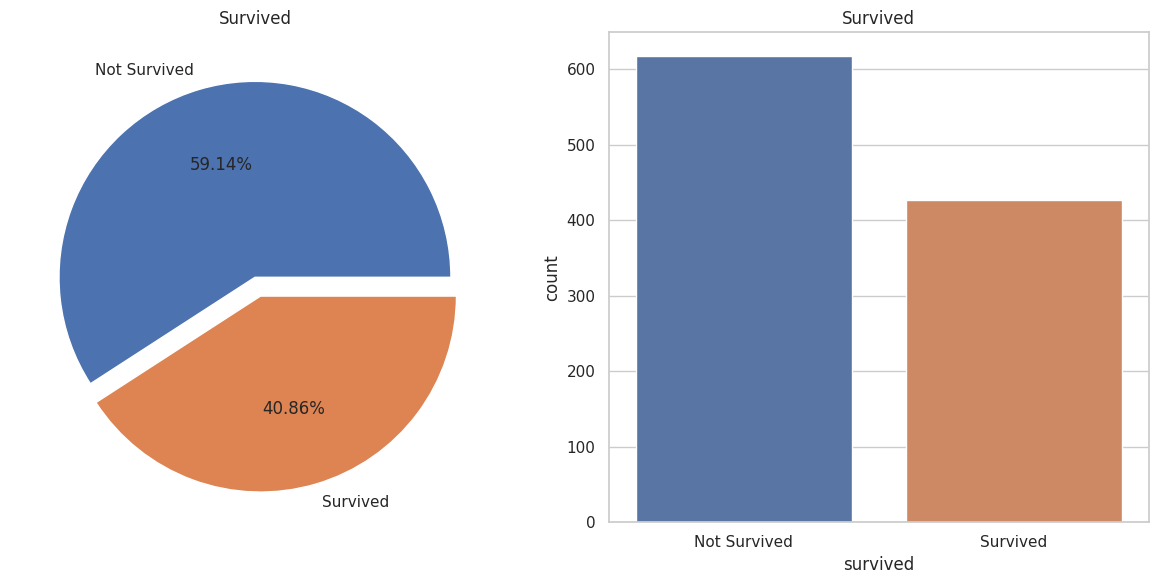

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart (원형 차트)
raw_data['survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.2f%%', labels=['Not Survived', 'Survived'], ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

# Count plot (바플롯)
sns.countplot(x='survived', data=raw_data, ax=ax[1])
ax[1].set_title('Survived')
ax[1].set_xticklabels(['Not Survived', 'Survived'])  # x축 레이블 변경

plt.tight_layout()
plt.show()

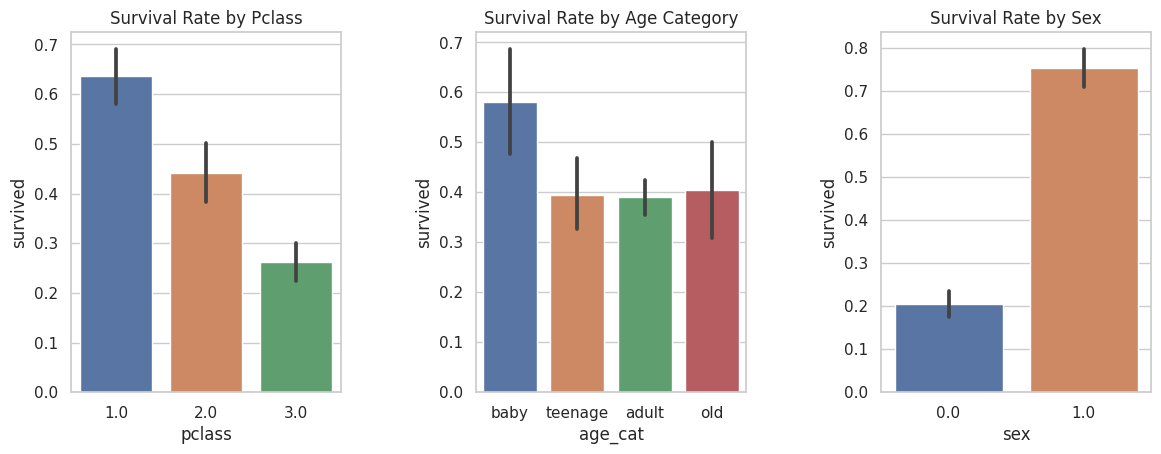

In [ ]:
raw_data['age_cat'] = pd.cut(raw_data['age'], bins=[0, 10, 20, 50, 100], include_lowest=True, labels=['baby', 'teenage', 'adult', 'old'])

plt.figure(figsize=[12, 4])

plt.subplot(131)  # 이렇게 하면 하나의 figure 안에 여러개의 작은 그래프 배치 가능
sns.barplot(x='pclass', y='survived', data=raw_data)
plt.title('Survival Rate by Pclass')

plt.subplot(132)
sns.barplot(x='age_cat', y='survived', data=raw_data)
plt.title('Survival Rate by Age Category')

plt.subplot(133)
sns.barplot(x='sex', y='survived', data=raw_data)
plt.title('Survival Rate by Sex')

plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()


# 한글 폰트 잘못 설치했다가 이상한거 뜬다.
# 그래도 그래프는 잘 나돔

## 3) 데이터 전처리

In [ ]:
# 'sex' 열의 값들을 매핑하여 변환
raw_data['sex'] = raw_data['sex'].map({'female': 1, 'male': 0})

# 결측치가 있는 행들을 삭제
raw_data.dropna(subset=['age', 'sibsp', 'parch', 'fare'], inplace=True)

# 열들의 데이터 타입을 변경
raw_data = raw_data.astype({
    'survived': 'float',
    'pclass': 'float',
    'sex': 'float',
    'sibsp': 'float',
    'parch': 'float',
    'fare': 'float'
})

# 데이터 정보 출력
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1045 non-null   float64
 1   survived   1045 non-null   float64
 2   name       1045 non-null   object 
 3   sex        1045 non-null   float64
 4   age        1045 non-null   float64
 5   sibsp      1045 non-null   float64
 6   parch      1045 non-null   float64
 7   ticket     1045 non-null   object 
 8   fare       1045 non-null   float64
 9   cabin      272 non-null    object 
 10  embarked   1043 non-null   object 
 11  boat       417 non-null    object 
 12  body       119 non-null    float64
 13  home.dest  685 non-null    object 
dtypes: float64(8), object(6)
memory usage: 122.5+ KB


In [ ]:
print(raw_data.head())

   pclass  survived                                             name  sex  \
0     1.0       1.0                    Allen, Miss. Elisabeth Walton  1.0   
1     1.0       1.0                   Allison, Master. Hudson Trevor  0.0   
2     1.0       0.0                     Allison, Miss. Helen Loraine  1.0   
3     1.0       0.0             Allison, Mr. Hudson Joshua Creighton  0.0   
4     1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  1.0   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000    0.0    0.0   24160  211.3375       B5        S    2    NaN   
1   0.9167    1.0    2.0  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Mon

In [ ]:
raw_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",1.0,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",0.0,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",1.0,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",0.0,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1.0,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,3.0,0.0,"Youseff, Mr. Gerious",0.0,45.5000,0.0,0.0,2628,7.2250,NaN,C,NaN,312.0,NaN
1304,3.0,0.0,"Zabour, Miss. Hileni",1.0,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",0.0,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",0.0,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


## 4)데이터셋 나누기

In [ ]:
from sklearn.model_selection import train_test_split

# X_data 정의 (입력 특성)
X_data = raw_data[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']].values

# y_data 정의 (타겟)
y_data = raw_data[['survived']].values

# 데이터셋을 훈련 및 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1, random_state=7)

## 5,6) 모델 구성하기

*   뉴련6개, dense:255, 활성화 relu/마지막dense 레이어 이진분류 출력 뉴런1, sigmoid
*   6. 모델 설정하기
 - (loss='mse', optimizer='Adam', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(255, input_shape=(6,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # 출력 뉴런 개수는 1, 활성화 함수는 sigmoid
model.compile(loss='mse', optimizer='Adam', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 255)               1785      
                                                                 
 dense_1 (Dense)             (None, 1)                 256       
                                                                 
Total params: 2,041
Trainable params: 2,041
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=300)

Epoch 1/300
30/30 [==============================] - 1s 2ms/step - loss: 0.2694 - accuracy: 0.6170
Epoch 2/300
30/30 [==============================] - 0s 2ms/step - loss: 0.2070 - accuracy: 0.7032
Epoch 3/300
30/30 [==============================] - 0s 2ms/step - loss: 0.1944 - accuracy: 0.7223
Epoch 4/300
30/30 [==============================] - 0s 2ms/step - loss: 0.1840 - accuracy: 0.7202
Epoch 5/300
30/30 [==============================] - 0s 2ms/step - loss: 0.1765 - accuracy: 0.7532
Epoch 6/300
30/30 [==============================] - 0s 3ms/step - loss: 0.1876 - accuracy: 0.7191
Epoch 7/300
30/30 [==============================] - 0s 2ms/step - loss: 0.1667 - accuracy: 0.7500
Epoch 8/300
30/30 [==============================] - 0s 2ms/step - loss: 0.1663 - accuracy: 0.7734
Epoch 9/300
30/30 [==============================] - 0s 2ms/step - loss: 0.1587 - accuracy: 0.7809
Epoch 10/300
30/30 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.7660
Epoch 11/

4/4 [==============================] - 0s 4ms/step - loss: 0.1568 - accuracy: 0.7714
Test_Loss: 0.15684626996517181
Test_acc: 0.7714285850524902
4/4 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

         0.0       0.79      0.84      0.81        62
         1.0       0.74      0.67      0.71        43

    accuracy                           0.77       105
   macro avg       0.77      0.76      0.76       105
weighted avg       0.77      0.77      0.77       105

Accuracy: 0.7714285714285715
Precision: 0.7435897435897436
Recall: 0.6744186046511628
F1 Score: 0.7073170731707318


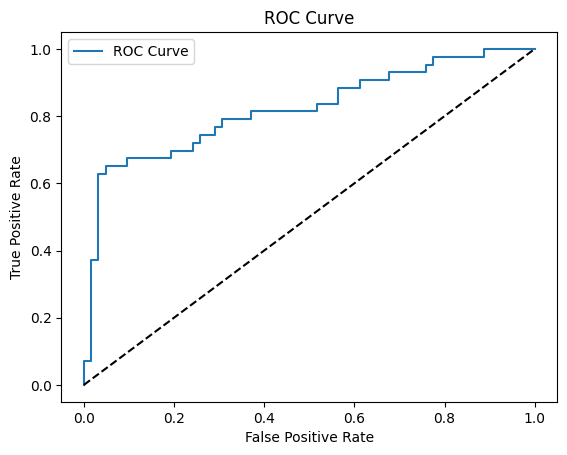

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve
import matplotlib.pyplot as plt

# 모델 평가하기
loss, accuracy = model.evaluate(X_test, y_test)
print("Test_Loss:", loss)
print("Test_acc:", accuracy)

# 예측값 계산
y_pred = model.predict(X_test)

# classification_report 출력
print(classification_report(y_test, y_pred.round()))

# 정확도, 정밀도, 재현율, F1 스코어 계산
accuracy = accuracy_score(y_test, y_pred.round())
precision = precision_score(y_test, y_pred.round())
recall = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# ROC Curve 그리기
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
import numpy as np

# 새로운 데이터 준비
dicaprio = np.array([3., 0., 19., 0., 0., 5.]).reshape(1, 6)
winslet = np.array([1., 1., 17., 1., 2., 100.]).reshape(1, 6)

# 모델로 예측 수행
dicaprio_survival_prob = model.predict(dicaprio)
winslet_survival_prob = model.predict(winslet)

# 예측 결과 출력
print("HotGUY Dicaprio's 생존률:", dicaprio_survival_prob[0][0])
print("hot GIRL Winslet's 생존률:", winslet_survival_prob[0][0])

1/1 [==============================] - 0s 31ms/step
HotGUY Dicaprio's 생존률: 0.24598004
hot GIRL Winslet's 생존률: 0.9996094
